In [2]:
import pandas as pd
import random

In [3]:
data = pd.read_csv('Salary.csv')
index = []
train_index=[]
test_index = []

# data = random.shuffle(data)
YearsExperience = list(data['YearsExperience'])
salary = list(data['Salary'])
m = len(salary)
temp = (m*80)//100

for i in range(0,m):
    index.append(i)

# print(index)
index = random.sample(index,len(index))

train_index = index[0:temp]
test_index = index[-(m-temp):]

print(test_index)

# print(temp)
x_train=[]
y_train=[]
x_test=[]
y_test=[]

for i in train_index:
    x_train.append(YearsExperience[i])
    y_train.append(salary[i])

# print(len(x_train))
for i in test_index:
     x_test.append(YearsExperience[i])
     y_test.append(salary[i])

# print(x_test)

[14, 4, 3, 31, 33, 2, 22]


In [4]:
#creating a linear Regression model
# Y = a0+a1*X
def salaryPredictionModel(salary,yearOfExperienced):
    A = 0
    B = 0
    C = 0
    D = 0
    m = len(salary)
    for x in yearOfExperienced:
        A += x
        C += (x*x)
        
    for i in range(0,len(salary)):
        x=yearOfExperienced[i]
        y=salary[i]
        B += y
        D += x*y
    
    a0 = (A*D - B*C)/(A*A - m*C)
    a1 = (A*B - D*m)/(A*A - m*C)
    return a0,a1

In [5]:
def prediction(y_train,x_train,x_test):
    y_predict=[]
    a0,a1 = salaryPredictionModel(y_train,x_train)
    for x in x_test:
          val = a0+a1*x
          y_predict.append(val)
        #   print(val)
    return y_predict

In [6]:
y_prediction = prediction(y_train,x_train,x_test)
# print(y_prediction)
error = 0
total = 0
for i in range(len(y_prediction)):
    error +=abs(y_prediction[i]-y_test[i])
    total += y_test[i]
    
avg = error/total
accuracy = 100-avg*100
print('accuracy is')
print(accuracy)


accuracy is
92.77142131820816


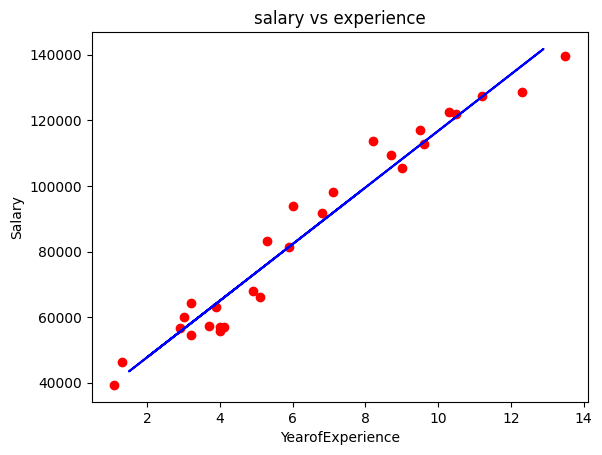

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_prediction,color='blue')
plt.title('salary vs experience')
plt.xlabel('YearofExperience')
plt.ylabel('Salary')
plt.show()